In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset


dataset = pd.read_csv('cleve.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values

In [21]:

#handling missing data

from sklearn.impute import SimpleImputer as imp
imputer=imp(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

In [22]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size = 0.25, random_state = 101)


In [7]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [23]:

dataset.num.value_counts()

0    165
1    138
Name: num, dtype: int64

In [24]:
#### logistic regression

#fitting LR to training set

from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)


C:\Users\utsav\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#Predict the test set results

y_Class_pred=classifier.predict(X_test)

In [26]:
#checking the accuracy for predicted results

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_Class_pred)

0.868421052631579

In [27]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_Class_pred)

In [28]:
#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_Class_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.94      0.79      0.86        38

    accuracy                           0.87        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76



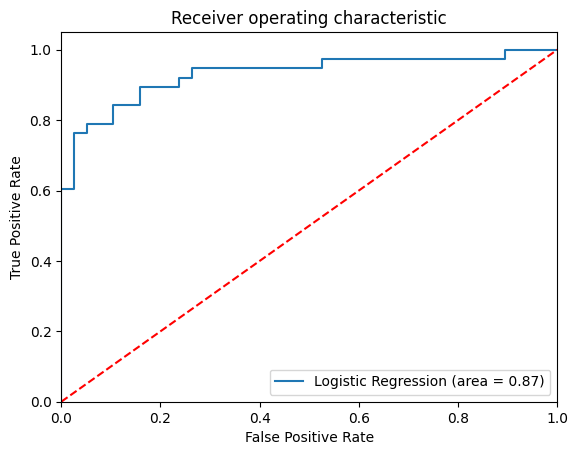

In [29]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [1]


C:\Users\utsav\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
